In [68]:
import pybamm
import numpy as np
import matplotlib.pyplot as plt
import string

# Bingham-Papanastasiou model
$$\underline{\underline{\tau}}=\left(\mu_B+\frac{\tau_y}{|\dot{\gamma}|}[1-exp(-m|\dot{\gamma}|)]\right)\underline{\underline{\dot{\gamma}}}$$

Where $\underline{\underline{\tau}}$ is the shear stress tensor [Pa], $\mu_B$ is the Bingham viscosity [$Pa\cdot s$], $\tau_y$ is the yield stress [$Pa$], $\dot{\gamma}$ is the shear strain [$1/s$] and $m$ is the parameter which describes the exponential growth of stress [$t$]

This model assume 1D so the equation has been simplified to: $$\tau=\mu_B\cdot\dot\gamma+\tau_y[1-exp(-m\dot\gamma)]$$

Text(0.5, -0.15, 'Figure 1: Shear stress versus shear rate for a simple shear for one-dimensional analogue of an ideal Bingham fluid and modified Bingham-Papanastasiou fluid')

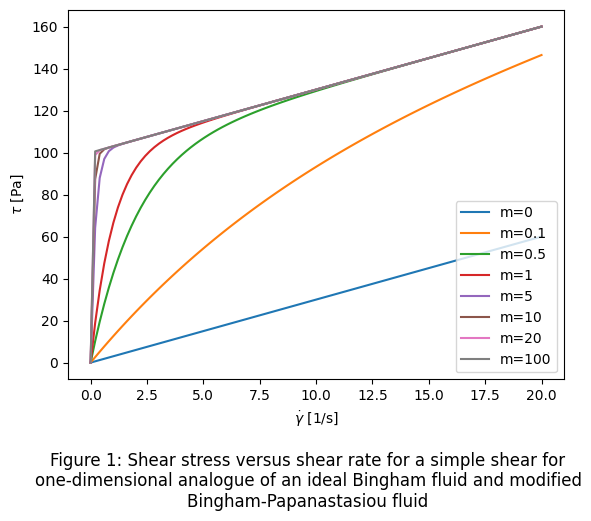

In [2]:
model = pybamm.BaseModel("Bingham-Papanastasiou model")

# define parameters
mu_B = pybamm.Parameter("Bingham viscosity [Pas]")
tau_y = pybamm.Parameter("Yield stress [Pa]")
gamma = pybamm.Parameter("Shear strain [s-1]")
m = pybamm.Parameter("Exponent parameter [t]")

# define variable
#h = pybamm.Variable("Coating thickness [m]")


# governing equations
model.variables["Shear stress [Pa]"] = mu_B*gamma + tau_y*(1-np.exp(-m*gamma))

#Add parameters
param = pybamm.ParameterValues(
    {
        "Exponent parameter [t]": "[input]",
        "Shear strain [s-1]": "[input]",
        "Yield stress [Pa]": 100,
        "Bingham viscosity [Pas]": 3,
    }
)
values = np.linspace(0, 20, 100)
shear_stress = []
m_values = [0,0.1,0.5,1,5,10,20,100]

#Loop over each m value and plot
for j in m_values:
    param["Exponent parameter [t]"] = j

    #Plots the solution to the model over a range of shear strain values for the given m value
    for i in values:
        sim = pybamm.Simulation(model, parameter_values=param, solver=pybamm.DummySolver())
        sol = sim.solve([0, 1], inputs={"Shear strain [s-1]":i})
        shear_stress.append(sol["Shear stress [Pa]"].entries[0])
    
    plt.plot(values, shear_stress, label = "m={}".format(j))
    shear_stress = []

#Figure labels
plt.legend()
plt.xlabel(r"$\dot\gamma$ [1/s]")
plt.ylabel(r"$\tau$ [Pa]")

#Figure caption
txt="Figure 1: Shear stress versus shear rate for a simple shear for one-dimensional analogue of an ideal Bingham fluid and modified Bingham-Papanastasiou fluid"
plt.figtext(0.5, -0.15, txt, wrap=True, horizontalalignment='center', fontsize=12)

# Tape thickness vs web velocity for power-law fluid - Quasi-steady state model
using: $$\delta=\frac{-\left[(-A_0h+A_1)^{\chi+1}-(A_1)^{\chi+1}\right]}{v_0\cdot A_0\cdot \psi \cdot \chi \cdot (\chi+1)}+A_2 h$$

Where $\chi=\frac 1n + 1$, $\psi = \frac{-1}{A_0\cdot k^{\frac 1n}}$, $A_0$ and $A_1$ are integration constants, $h$ is the doctor blade height [mm], $k$ is the consistency of fluid [$Pa\cdot s^n$], $n$ is the power-law index, $v_0$ is the substrate speed [mm/s].

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Text(0.5, -0.1, 'Figure 2: Variation of the tape thickness by the substrate velocity')

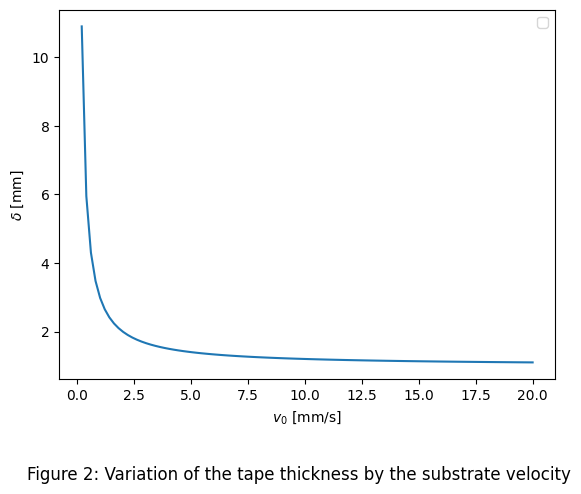

In [113]:
model = pybamm.BaseModel("Tape thickness (Power-law)")

# define parameters
A_0 = pybamm.Parameter("Integration constant 0")
A_1 = pybamm.Parameter("Integration constant 1")
A_2 = pybamm.Parameter("Integration constant 2")
h = pybamm.Parameter("Blade height [mm]")
k = pybamm.Parameter("Consistency [Pas^n]")
n = pybamm.Parameter("Power-law index")
v_0 = pybamm.Parameter("Substrate speed [mms-1]")

# governing equations
model.variables["Tape thickness [mm]"] = (-(-A_0*h+A_1)**(1/n+2)-(A_1)**(1/n+2))/(v_0*A_0*(-1/A_0*k**(1/n))*(1/(n+1))*(1/(n+2)))+A_2*h

#Add parameters
param = pybamm.ParameterValues(
    {
        "Integration constant 0": 1,
        "Integration constant 1": 1,
        "Integration constant 2": 1,
        "Blade height [mm]": 1,
        "Consistency [Pas^n]": 3,
        "Power-law index": 1,
        "Substrate speed [mms-1]": "[input]",
    }
)
values = np.linspace(0, 20, 100)
shear_stress = []

#Plots the solution to the model over a range of shear strain values
for i in values:
    sim = pybamm.Simulation(model, parameter_values=param, solver=pybamm.DummySolver())
    sol = sim.solve([0, 1], inputs={"Substrate speed [mms-1]":i})
    shear_stress.append(sol["Tape thickness [mm]"].entries[0])
    
plt.plot(values, shear_stress)

#Figure labels
plt.legend()
plt.xlabel(r"$v_0$ [mm/s]")
plt.ylabel(r"$\delta$ [mm]")

#Figure caption
txt="Figure 2: Variation of the tape thickness by the substrate velocity"
plt.figtext(0.5, -0.1, txt, wrap=True, horizontalalignment='center', fontsize=12)

Text(0.5, -0.1, 'Figure 2: Variation of the tape thickness by the substrate velocity')

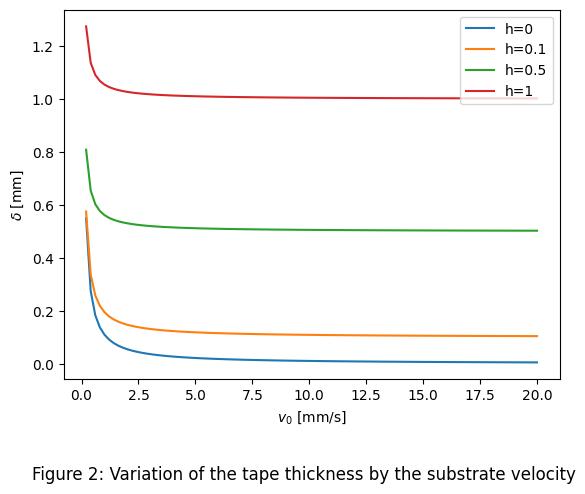

In [33]:
model = pybamm.BaseModel("Tape thickness (Power-law)")

# define parameters
A_0 = pybamm.Parameter("Integration constant 0")
A_1 = pybamm.Parameter("Integration constant 1")
A_2 = pybamm.Parameter("Integration constant 2")
h = pybamm.Parameter("Blade height [mm]")
k = pybamm.Parameter("Consistency [Pas^n]")
n = pybamm.Parameter("Power-law index")
v_0 = pybamm.Parameter("Substrate speed [mms-1]")

# governing equations
model.variables["Tape thickness [mm]"] = (-(-A_0*h+A_1)**(1/n+2)-(A_1)**(1/n+2))/(v_0*A_0*(-1/A_0*k**(1/n))*(1/n+1)*(1/n+2))+A_2*h

#Add parameters
param = pybamm.ParameterValues(
    {
        "Integration constant 0": 1,
        "Integration constant 1": 1,
        "Integration constant 2": 1,
        "Blade height [mm]": "[input]",
        "Consistency [Pas^n]": 3,
        "Power-law index": "[input]",
        "Substrate speed [mms-1]": "[input]",
    }
)
v_0_values = np.linspace(0, 20, 100)
tape_thickness_h = []
tape_thickness_n = []
values = [0,0.1,0.5,1]

#Loop over each m value and plot
for j in values:
    param["Blade height [mm]"] = j
    param["Power-law index"] = 1

    #Plots the solution to the model over a range of shear strain values for the given m value
    for i in v_0_values:
        sim_h = pybamm.Simulation(model, parameter_values=param, solver=pybamm.DummySolver())
        sol_h = sim_h.solve([0, 1], inputs={"Substrate speed [mms-1]":i})
        tape_thickness_h.append(sol_h["Tape thickness [mm]"].entries[0])
    
    plt.plot(v_0_values, tape_thickness_h, label = "h={}".format(j))
    tape_thickness_h = []

#Figure labels
plt.xlabel(r"$v_0$ [mm/s]")
plt.ylabel(r"$\delta$ [mm]")
plt.legend()

#Figure caption
txt="Figure 2: Variation of the tape thickness by the substrate velocity"
plt.figtext(0.5, -0.1, txt, wrap=True, horizontalalignment='center', fontsize=12)

Text(0.5, -0.1, 'Figure 2: Variation of the tape thickness by the substrate velocity for different h values (a) and n values (b)')

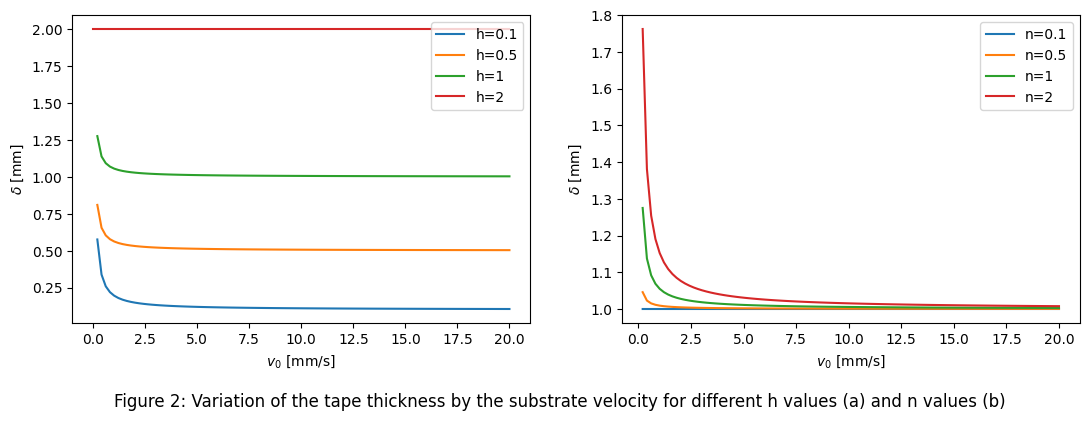

In [42]:
model = pybamm.BaseModel("Tape thickness (Power-law)")

# define parameters
A_0 = pybamm.Parameter("Integration constant 0")
A_1 = pybamm.Parameter("Integration constant 1")
A_2 = pybamm.Parameter("Integration constant 2")
h = pybamm.Parameter("Blade height [mm]")
k = pybamm.Parameter("Consistency [Pas^n]")
n = pybamm.Parameter("Power-law index")
v_0 = pybamm.Parameter("Substrate speed [mms-1]")

# define variable
#h = pybamm.Variable("Coating thickness [m]")


# governing equations
model.variables["Tape thickness [mm]"] = (-(-A_0*h+A_1)**(1/n+2)-(A_1)**(1/n+2))/(v_0*A_0*(-1/A_0*k**(1/n))*(1/n+1)*(1/n+2))+A_2*h

#Add parameters
param = pybamm.ParameterValues(
    {
        "Integration constant 0": 1,
        "Integration constant 1": 1,
        "Integration constant 2": 1,
        "Blade height [mm]": "[input]",
        "Consistency [Pas^n]": 3,
        "Power-law index": "[input]",
        "Substrate speed [mms-1]": "[input]",
    }
)

v_0_values = np.linspace(0, 20, 100)
tape_thickness_h = []
tape_thickness_n = []
values = [0.1,0.5,1,2]

# plot
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(13, 4))

#Loop over each h value and plot
for j in values:
    param["Blade height [mm]"] = j
    param["Power-law index"] = 1

    #Plots the solution to the model over a range of substrate speed values for the given h value
    for i in v_0_values:
        sim_h = pybamm.Simulation(model, parameter_values=param, solver=pybamm.DummySolver())
        sol_h = sim_h.solve([0, 1], inputs={"Substrate speed [mms-1]":i})
        tape_thickness_h.append(sol_h["Tape thickness [mm]"].entries[0])
    
    ax1.plot(v_0_values, tape_thickness_h, label = "h={}".format(j))
    tape_thickness_h = []


#Loop over each n value and plot
for q in values:
    param["Power-law index"] = q
    param["Blade height [mm]"] = 1

    #Plots the solution to the model over a range of substrate speed values for the given n value
    for g in v_0_values:
        sim = pybamm.Simulation(model, parameter_values=param, solver=pybamm.DummySolver())
        sol = sim.solve([0, 1], inputs={"Substrate speed [mms-1]":g})
        tape_thickness_n.append(sol["Tape thickness [mm]"].entries[0])
    
    ax2.plot(v_0_values, tape_thickness_n, label = "n={}".format(q))
    tape_thickness_n = []



#Figure labels
ax1.set_xlabel(r"$v_0$ [mm/s]")
ax1.set_ylabel(r"$\delta$ [mm]")
ax1.legend()

ax2.set_xlabel(r"$v_0$ [mm/s]")
ax2.set_ylabel(r"$\delta$ [mm]")
ax2.legend()


#Figure caption
txt="Figure 2: Variation of the tape thickness by the substrate velocity for different h values (a) and n values (b)"
plt.figtext(0.5, -0.1, txt, wrap=True, horizontalalignment='center', fontsize=12)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


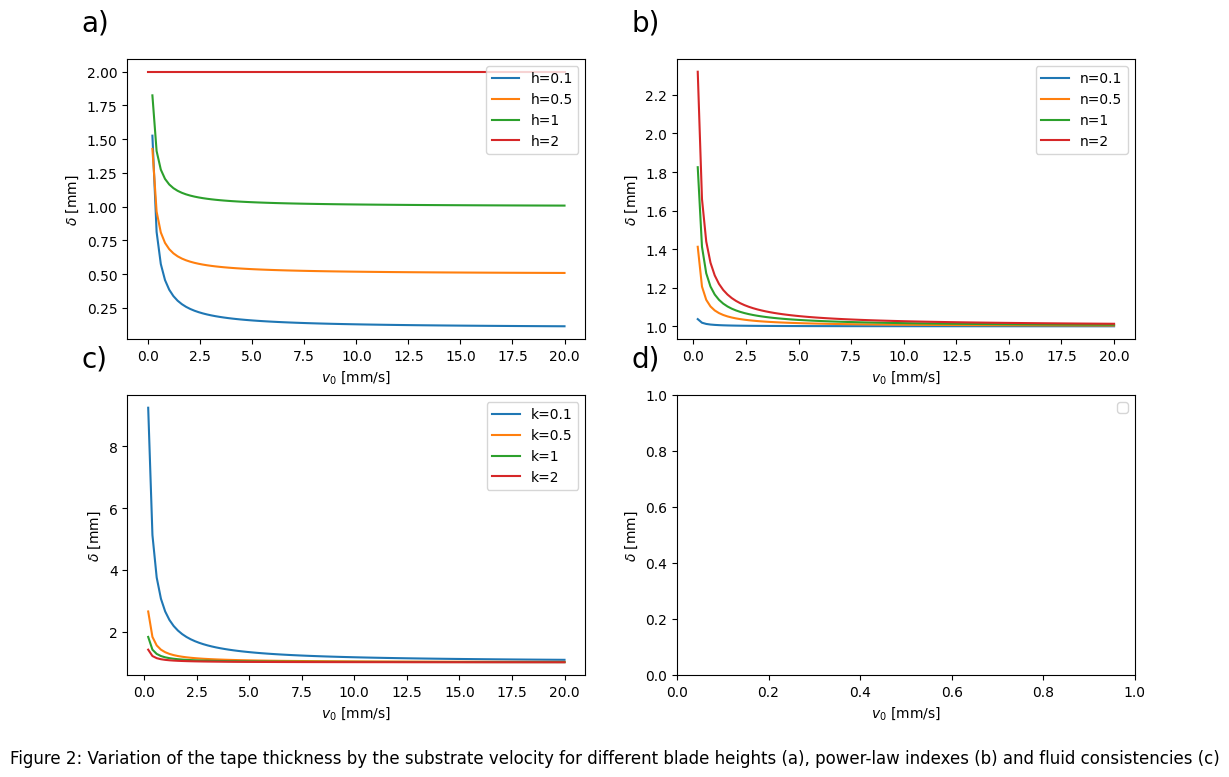

In [74]:
model = pybamm.BaseModel("Tape thickness (Power-law)")

# define parameters
A_0 = pybamm.Parameter("Integration constant 0")
A_1 = pybamm.Parameter("Integration constant 1")
A_2 = pybamm.Parameter("Integration constant 2")
h = pybamm.Parameter("Blade height [mm]")
k = pybamm.Parameter("Consistency [Pas^n]")
n = pybamm.Parameter("Power-law index")
v_0 = pybamm.Parameter("Substrate speed [mms-1]")

# governing equations
model.variables["Tape thickness [mm]"] = (-(-A_0*h+A_1)**(1/n+2)-(A_1)**(1/n+2))/(v_0*A_0*(-1/A_0*k**(1/n))*(1/n+1)*(1/n+2))+A_2*h

#Add parameters
param = pybamm.ParameterValues(
    {
        "Integration constant 0": 1,
        "Integration constant 1": 1,
        "Integration constant 2": 1,
        "Blade height [mm]": "[input]",
        "Consistency [Pas^n]": "[input]",
        "Power-law index": "[input]",
        "Substrate speed [mms-1]": "[input]",
    }
)

v_0_values = np.linspace(0, 20, 100)
tape_thickness_h = []
tape_thickness_n = []
tape_thickness_k = []
values = [0.1,0.5,1,2]

# plot
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(13, 8))

#Loop over each h value and plot
for j in values:
    param.update(
        {
            "Power-law index": 1,
            "Blade height [mm]": j,
            "Consistency [Pas^n]": 1,
        }
    )

    #Plots the solution to the model over a range of substrate speed values for the given h value
    for i in v_0_values:
        sim_h = pybamm.Simulation(model, parameter_values=param, solver=pybamm.DummySolver())
        sol_h = sim_h.solve([0, 1], inputs={"Substrate speed [mms-1]":i})
        tape_thickness_h.append(sol_h["Tape thickness [mm]"].entries[0])
    
    ax1.plot(v_0_values, tape_thickness_h, label = "h={}".format(j))
    tape_thickness_h = []

#Loop over each n value and plot
for q in values:
    param.update(
        {
            "Power-law index": q,
            "Blade height [mm]": 1,
            "Consistency [Pas^n]": 1,
        }
    )

    #Plots the solution to the model over a range of substrate speed values for the given n value
    for g in v_0_values:
        sim = pybamm.Simulation(model, parameter_values=param, solver=pybamm.DummySolver())
        sol = sim.solve([0, 1], inputs={"Substrate speed [mms-1]":g})
        tape_thickness_n.append(sol["Tape thickness [mm]"].entries[0])
    
    ax2.plot(v_0_values, tape_thickness_n, label = "n={}".format(q))
    tape_thickness_n = []

#Loop over each k value and plot
for p in values:
    param.update(
        {
            "Power-law index": 1,
            "Blade height [mm]": 1,
            "Consistency [Pas^n]": p,
        }
    )

    #Plots the solution to the model over a range of substrate speed values for the given k value
    for g in v_0_values:
        sim = pybamm.Simulation(model, parameter_values=param, solver=pybamm.DummySolver())
        sol = sim.solve([0, 1], inputs={"Substrate speed [mms-1]":g})
        tape_thickness_k.append(sol["Tape thickness [mm]"].entries[0])
    
    ax3.plot(v_0_values, tape_thickness_k, label = "k={}".format(p))
    tape_thickness_k = []



#Figure labels
for axis in (ax1, ax2, ax3, ax4):
    axis.set_xlabel(r"$v_0$ [mm/s]")
    axis.set_ylabel(r"$\delta$ [mm]")
    axis.legend()


#Figure caption
txt="Figure 2: Variation of the tape thickness by the substrate velocity for different blade heights (a), power-law indexes (b) and fluid consistencies (c)"
plt.figtext(0.5,0, txt, wrap=True, horizontalalignment='center', fontsize=12)

#Adds subplot labels a), b) etc
for n, ax in enumerate((ax1, ax2, ax3, ax4)):
    ax.text(-0.1, 1.1, string.ascii_lowercase[n]+")", transform=ax.transAxes, 
            size=20)

In [98]:
def viscous_model(name):
    if name == "Power-law":
        model.variables["Shear stress [Pa]"] = mu_B*gamma
    elif name == "Bingham":
        model.variables["Shear stress [Pa]"] = mu_B*gamma + tau_y
    elif name == "Bingham-Papanastasiou":
        model.variables["Shear stress [Pa]"] = mu_B*gamma + tau_y*(1-np.exp(-m*gamma))
    elif name == "Herschel-Bulkley":
        model.variables["Shear stress [Pa]"] = k*gamma**n + tau_y
    elif name == "Herschel-Bulkley-Papanastasiou":
        model.variables["Shear stress [Pa]"] = k*gamma**n + tau_y*(1-np.exp(-m*gamma))
    elif name == "Casson":
        model.variables["Shear stress [Pa]"] = (np.sqrt(tau_y)+np.sqrt(mu_B*gamma))**2
    elif name == "Casson-Papanastasiou":
        model.variables["Shear stress [Pa]"] = (np.sqrt(tau_y)*(1-np.exp(-np.sqrt(m*gamma)))+np.sqrt(mu_B*gamma))**2

Text(0.5, -0.15, 'Figure 1: Shear stress versus shear rate for a simple shear for one-dimensional analogue of an ideal Casson fluid and modified Casson-Papanastasiou fluid')

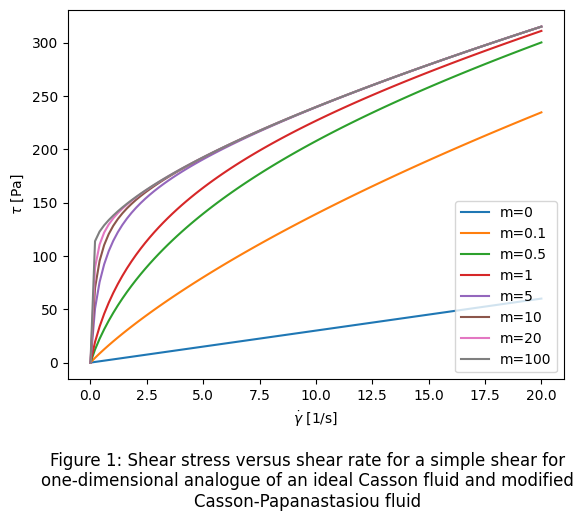

In [112]:
model = pybamm.BaseModel("Bingham-Papanastasiou model")

# define parameters
mu_B = pybamm.Parameter("Bingham viscosity [Pas]")
tau_y = pybamm.Parameter("Yield stress [Pa]")
gamma = pybamm.Parameter("Shear strain [s-1]")
m = pybamm.Parameter("Exponent parameter [t]")
k = pybamm.Parameter("Consistency [Pas^n]")
n = pybamm.Parameter("Power-law index")

# governing equations
viscous_model("Casson-Papanastasiou")

#Add parameters
param = pybamm.ParameterValues(
    {
        "Exponent parameter [t]": "[input]",
        "Shear strain [s-1]": "[input]",
        "Yield stress [Pa]": 100,
        "Bingham viscosity [Pas]": 3,
        "Power-law index": 4,
        "Consistency [Pas^n]": 3,
    }
)
values = np.linspace(0, 20, 100)
shear_stress = []
m_values = [0,0.1,0.5,1,5,10,20,100]

#Loop over each m value and plot
for j in m_values:
    param["Exponent parameter [t]"] = j

    #Plots the solution to the model over a range of shear strain values for the given m value
    for i in values:
        sim = pybamm.Simulation(model, parameter_values=param, solver=pybamm.DummySolver())
        sol = sim.solve([0, 1], inputs={"Shear strain [s-1]":i})
        shear_stress.append(sol["Shear stress [Pa]"].entries[0])
    
    plt.plot(values, shear_stress, label = "m={}".format(j))
    shear_stress = []

#Figure labels
plt.legend()
plt.xlabel(r"$\dot\gamma$ [1/s]")
plt.ylabel(r"$\tau$ [Pa]")

#Figure caption
txt="Figure 1: Shear stress versus shear rate for a simple shear for one-dimensional analogue of an ideal Casson fluid and modified Casson-Papanastasiou fluid"
plt.figtext(0.5, -0.15, txt, wrap=True, horizontalalignment='center', fontsize=12)